# Michael Schumacher's journey in Formula 1

Michael Schumacher is one of the two greatest Fomula 1 drivers of all times.
Schumacher won seven World Champion titles, achieved 91 wins in races and gained 68 pole psotions.

In this notebook, I will analyze Schumacher's career in Formula 1 using data from these two sources:
https://www.statsf1.com/en/michael-schumacher and https://en.wikipedia.org/wiki/Michael_Schumacher
        
Let's start!

<p align="left">
  <img 
    width="400"
    height="400"
    src="Schumacher.jpg"
  >
</p>

In [1]:
# Load useful packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.ticker as mticker
import matplotlib

import warnings
warnings.filterwarnings('ignore')

Let's load Michael Schumacher's data as a data frame and inspect it.

In [2]:
schumacher=pd.read_excel(r'schumacher.xlsx')
schumacher.head()

,n,Year,Grand Prix,Team,N°,Constructor,Constructor2,Engine,Engine2,Tyre,Grid,Race,Race2
0,308,2012,Brazil,Mercedes AMG Petronas F1 Team,7,Mercedes,F1 W03,Mercedes,V8,Pirelli,13,7,NaN
1,307,2012,USA,Mercedes AMG Petronas F1 Team,7,Mercedes,F1 W03,Mercedes,V8,Pirelli,5,16,NaN
2,306,2012,Abu Dhabi,Mercedes AMG Petronas F1 Team,7,Mercedes,F1 W03,Mercedes,V8,Pirelli,13,11,NaN
3,305,2012,India,Mercedes AMG Petronas F1 Team,7,Mercedes,F1 W03,Mercedes,V8,Pirelli,14,22,Gearbox
4,304,2012,South Korea,Mercedes AMG Petronas F1 Team,7,Mercedes,F1 W03,Mercedes,V8,Pirelli,10,13,NaN


In [3]:
schumacher.shape

(308, 13)

The data frame contains 308 rows corresponding to 308 Formula 1 races in which Michael Schumacher participated.

There are 4 columns in this data frame:

* column **'n'** contains the numbers in chronological order of all races in which Schumacher participated;
* column **'Year'** contains years;
* column **'Gran Prix'** contains names of Grand Prix corresponding to each race;
* column **'Team'** contains official names of the corresponding teams which Schumacher represented in each race;
* column **'N°'** contains Schumacher's official driver's number;
* column **'Constructor'** contains the names of the constructors Schumacher represented in each race;
* column **'Constructor2'** contains information about the model of the car Michael drove in each race;
* column **'Engine'** contains the name of the producer of the engine in Schumacher's car;
* column **'Engine2'** contains labels indicating the type of engine: either V8 (8 cylinders) or V10 (10 cylinders);
* column **'Tyre'** indicates the manufacturer of tyres for each particular race;
* column **'Grid'** contains Schumacher's grid position at the start of each race;
* column **'Race'** contains the position at which Schumacher finished in each race;
* column **'Race2'** indicates the reason why Schumacher could not finish a race (in case he did not finish).



## Data transformation and cleaning

Let's rename columns **'Constructor'**,**'Race2'**,**'Engine2'** and **'Race2'** so the new names better reflect the contents of the columns.

In [4]:
schumacher.rename(columns = {'Constructor2':'car_model','Race2':'reason_out','Engine2':'engine_type'}, inplace = True)

Let's now inspect each column.

In [5]:
schumacher.head()

,n,Year,Grand Prix,Team,N°,Constructor,car_model,Engine,engine_type,Tyre,Grid,Race,reason_out
0,308,2012,Brazil,Mercedes AMG Petronas F1 Team,7,Mercedes,F1 W03,Mercedes,V8,Pirelli,13,7,NaN
1,307,2012,USA,Mercedes AMG Petronas F1 Team,7,Mercedes,F1 W03,Mercedes,V8,Pirelli,5,16,NaN
2,306,2012,Abu Dhabi,Mercedes AMG Petronas F1 Team,7,Mercedes,F1 W03,Mercedes,V8,Pirelli,13,11,NaN
3,305,2012,India,Mercedes AMG Petronas F1 Team,7,Mercedes,F1 W03,Mercedes,V8,Pirelli,14,22,Gearbox
4,304,2012,South Korea,Mercedes AMG Petronas F1 Team,7,Mercedes,F1 W03,Mercedes,V8,Pirelli,10,13,NaN


In [6]:
schumacher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   n            308 non-null    int64 
 1   Year         308 non-null    int64 
 2   Grand Prix   308 non-null    object
 3   Team         308 non-null    object
 4   N°           308 non-null    int64 
 5   Constructor  308 non-null    object
 6   car_model    308 non-null    object
 7   Engine       308 non-null    object
 8   engine_type  308 non-null    object
 9   Tyre         308 non-null    object
 10  Grid         308 non-null    int64 
 11  Race         308 non-null    object
 12  reason_out   72 non-null     object
dtypes: int64(4), object(9)
memory usage: 31.4+ KB


As we can see, all the columns, except for the column **'reason_out'**, do not contain any null values. 
The column **'reason_out'** contains 72 non-null values and 236 null values. 
This is becuase **'reason_out'** is non-null only for the races which Schumacher did not finish, and the values of the
variable **'reason_out'** indicate the reasons why those races were not finished by Schumacher.

Let's now inspect the column **'Race'** which contains the position numbers at wich Schumacher finished the races.

In [7]:
schumacher['Race'].value_counts()

1      91
ab     64
2      43
3      21
4      15
7      13
5      13
6      12
10      6
8       6
9       6
11      5
12      3
15      2
13      2
dsq     2
16      1
17      1
22      1
np      1
Name: Race, dtype: int64

As you see, besides the numbers indicating the driver's final position, the column contains values like 'ab','dsq' and 'np' meaning that Michael could not finish
that particular race, e.g. because of an accident or disqualification.

Let's substitute these labels with '0' and make this column numeric.

In [8]:
schumacher.loc[((schumacher.Race=='ab')|(schumacher.Race=='dsq')|(schumacher.Race=='np')), 'Race'] = 0
schumacher['Race']=pd.to_numeric(schumacher['Race'])

Now, we will start the analysis of Michael Schumacher's performance in Formula 1.

Let's load data summarizing Schumacher's career in professional races and containg 
the rank and the number of points he gained in each season.

In [9]:
career=pd.read_excel(r'career_summary.xlsx')
career.head()

,Season,Series,Team,Races,Wins,Poles,F/Laps,Podiums,Points,Position
0,1988,European Formula Ford 1600,Eufra Racing,4,1,1,0,3,50.0,2
1,1988,German Formula Ford 1600,Eufra Racing,7,3,0,0,5,124.0,6
2,1988,Formula König,Hoecker Sportwagenservice,10,9,1,1,10,192.0,1
3,1989,German Formula Three,WTS Racing,12,2,2,0,7,163.0,3
4,1989,European Formula Three Cup,WTS Racing,1,0,0,0,0,NaN,NC


This dataset loaded from Wikipedia,besides Formula 1 data,contains information about Schumacher's results in other competitions.
Since in this notebook we analyze Schumacher's career in Formula 1, let's create a subset with only Formula 1-related data.

In [10]:
career_F1=career[career['Series']=='Formula One']

## What was Michael Schumacher's best season in Formula 1?


Let's look at Schumacher's overal performance as a Formula 1 driver.

In [11]:
performance_by_season=career_F1.groupby('Season')[['Wins','Podiums','F/Laps','Points']].sum()

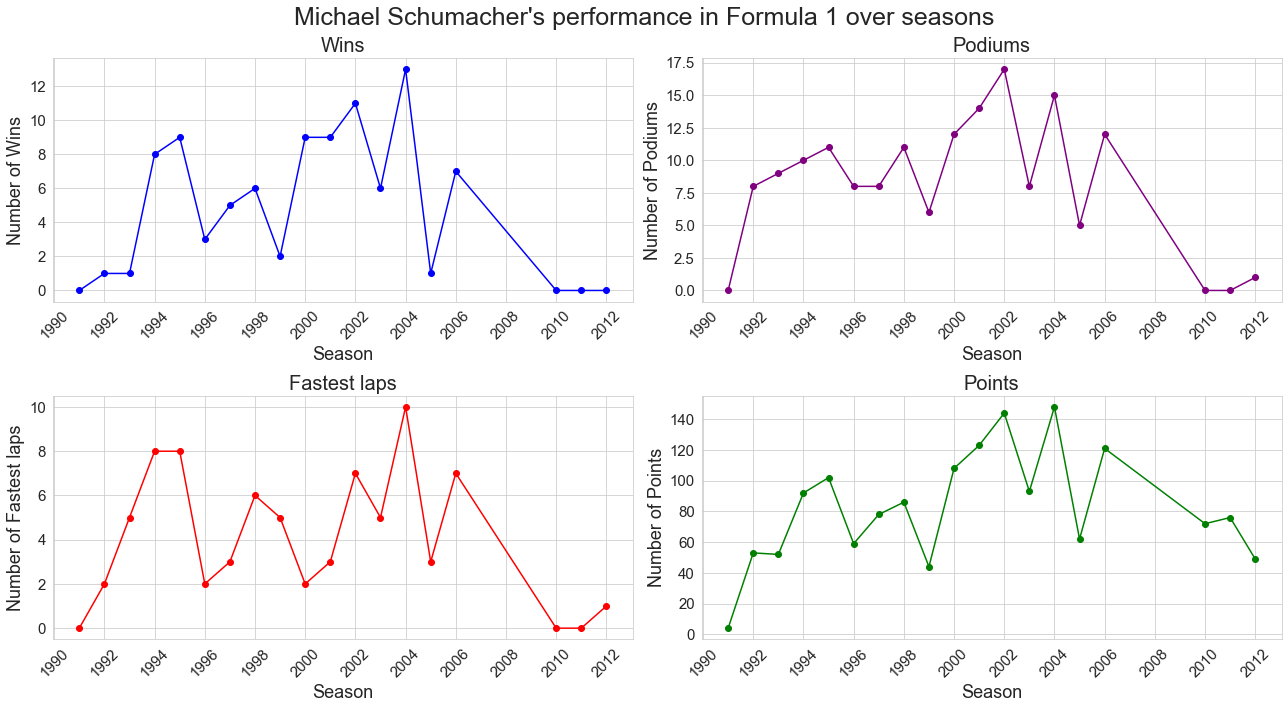

In [12]:
fig, ax=plt.subplots(2,2, figsize=(18,10))


#initializing the subplot index
n=0
colors=['blue','purple','red','green']
columns=['Wins','Podiums','Fastest laps','Points']

for row in range(2):
    for col in range(2):
        ax[row,col].plot(performance_by_season.index,performance_by_season.iloc[:,n],color=colors[n])
        ax[row,col].plot(performance_by_season.index,performance_by_season.iloc[:,n],color=colors[n],marker='o',
                         linestyle='none')
        
        ax[row,col].set_ylabel('Number of '+columns[n],fontsize=18)
        ax[row,col].set_xlabel('Season',fontsize=18)
        ax[row,col].tick_params(axis='x', labelrotation=45,labelsize=15)
        ax[row,col].tick_params(axis='y', labelsize=15)
        ax[row,col].set_title(columns[n],fontsize=20)
        ax[row,col].set_xticks(np.arange(1990, 2013, 2))
        # index for the next subplot
        n+=1
            
            
plt.suptitle("Michael Schumacher's performance in Formula 1 over seasons",y=0.98,fontsize=25)
plt.tight_layout()
plt.show()

Overall, by looking at the plots above, we can conclude that there were two peaks of best performance in Schumacher's career
in Formula 1 corresponding to the seasons 1994-1995 and seasons 2000-2004. This is not surprising as in all those seasons 
Schumacher won the World Champion title.

The best two seasons in Schumacher's career were the seasons of 2002 and 2004: in 2002, Michael won 11 races, had 17 podiums,
7 fastest laps in races and obtained over 140 points in total; in 2004, Schumacher won 13 races, had 15 podiums,10 fastest 
laps and gained over 140 points.

In the season 2004, Schumacher had the fastest car of all his career - that year, the driver had the nost amount of fastest laps
in races. Interestingly, in 2002, Schumacher had only 2 fastest laps in races (the same amount as he had in 1996,
the year he joined Ferrari), although this disatvange of apparently not having the fastest car did not stop Michael from
winning the World Champion title that year.

The worst seasons in Schumacher's career in Formula 1 one were the last three seasons in his career which he spent in the
'Mercedes AMG Petronas' team, as well as Michael's debut season in 1991 (however Schumacher entered the season around its
midpoint in August so naturally he could not achive his maximum possible result that year).



<span style="color:red;font-weight:700;font-size:20px">
     Best season:  2004
</span>


## Schumacher's overall performance in Formula 1

Lets's analyze the column **'Position'** in the **career_F1** data frame. This column indicates the final rank
Michael Schumacher had in each season throughout his career in Formula 1.

In [13]:
career_F1['Position'].value_counts()

1      7
3      3
14     2
2      2
4      1
DSQ    1
5      1
9      1
8      1
13     1
Name: Position, dtype: int64

We see that Michael Schumacher won the Formula 1 World Champion title seven times, he became vice-champion twice and he was the third 
driver of the season three times.

Interestingly, in one of the seasons Schumacher was disqualified (career_F1['Position']='DSQ'). It happened in 1997, that year,
Schumacher lost the Champion's title in the last Grand Prix of the season: he collided with Jaques Villeneuve's car and could not 
finish the race. The canadian driver finished the race and got enough points to become the World Champion, and Schumacher
gained the second largest amount of points. However, Michael did not officially finished the second that season, instead,
he was diqualified because of that accident with Jaques Villeneuve.


A good way of estimating a driver's performance over years is to analyze his positions at the finish lines of the races 
as well as his initial positions on the grid (gained in qualification sessions).

Let's calculate the frequency of occurence of different race and grid positions in Schumacher's career as a Formula 1 driver.

In [14]:
races=pd.DataFrame(schumacher['Race'].value_counts().reset_index().values,columns=['position','occurences'])
races['percentage']=races['occurences']/races.occurences.sum()
races.head()

,position,occurences,percentage
0,1,91,0.295455
1,0,67,0.217532
2,2,43,0.139610
3,3,21,0.068182
4,4,15,0.048701


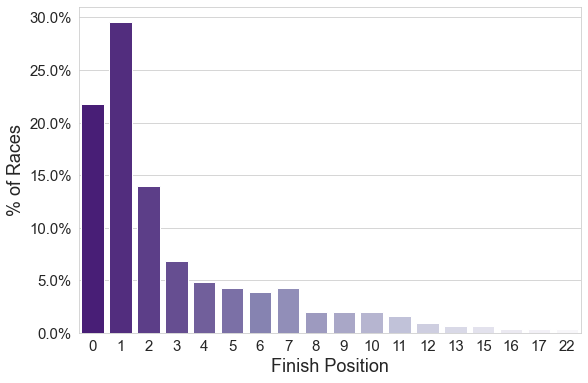

In [15]:
# Plot percentage of occurance of different positions in races in the form of a barplot
fig1, ax1=plt.subplots(figsize=(9,6))

sns.barplot(ax=ax1,x='position', y='percentage', data=races,palette='Purples_r')

ax1.tick_params(axis='x',labelsize=15)
ax1.tick_params(axis='y',labelsize=15)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0, decimals=1))
ax1.set_ylabel('% of Races',fontsize=18)
ax1.set_xlabel('Finish Position',fontsize=18)

plt.show()

Wow, the most frequent result in races for Schumacher was the first position: the driver won almost 30% of the races he participated in.
On the other hand, we can see that Schumacher did not finish races quite frequently - in 21% of the races.
    
Another very frequent outcome for Schumacher was to finish races at the second position: he came second in 14% of the cases.   

In [16]:
grids=pd.DataFrame(schumacher['Grid'].value_counts().reset_index().values,columns=['grid','occurences'])
grids['percentage']=grids['occurences']/grids.occurences.sum()
grids.head()

,grid,occurences,percentage
0,1,68,0.220779
1,3,53,0.172078
2,2,48,0.155844
3,4,27,0.087662
4,5,19,0.061688


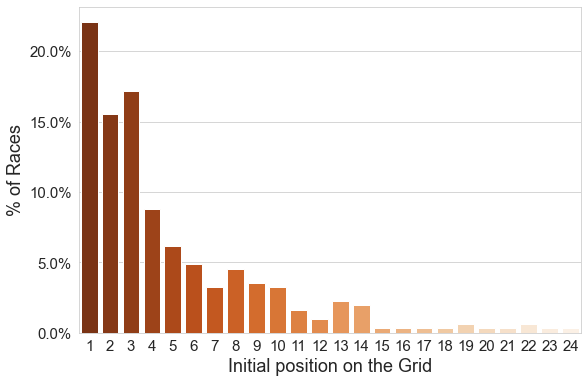

In [17]:
fig2, ax2=plt.subplots(figsize=(9,6))

sns.barplot(ax=ax2,x='grid', y='percentage', data=grids,palette='Oranges_r')

ax2.tick_params(axis='x',labelsize=15)
ax2.tick_params(axis='y',labelsize=15)
ax2.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0, decimals=1))
ax2.set_ylabel('% of Races',fontsize=18)
ax2.set_xlabel('Initial position on the Grid',fontsize=18)

plt.show()

As we can see, Schumacher's most frequent grid position was the frist postion: Michael started races from pole positions 
in 23% of the cases.

He also frequently started races from the third and the second positons on the grid - in 17% and 15% of the cases correspondingly.

In [18]:
print(round(schumacher[schumacher.Race!=0].Race.mean(),2))

3.7


On average, throughout his career in Formula 1, Michael Schuacher finished races at the position number 3.7, 
so his average result per race is between the third and the fourth position. Note, that we excluded the 0 position from the calculation!

Let's see how Schumacher's everage position in races evolved from season to season.

In [19]:
seasons=pd.DataFrame(schumacher[schumacher.Race!=0].groupby('Year').Race.mean().reset_index().values,columns=['Year','position'])
seasons['Year']=seasons['Year'].astype('int')
seasons.head()

,Year,position
0,1991,5.666667
1,1992,3.166667
2,1993,2.222222
3,1994,1.200000
4,1995,2.307692


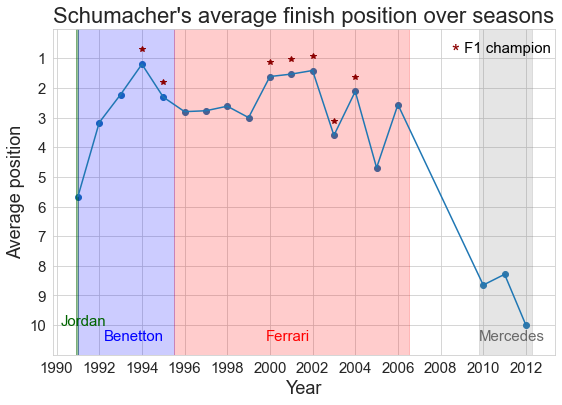

In [20]:
# Plot average position in races over seasons
fig2,ax2 =plt.subplots(figsize=(9,6))
ax2.scatter(seasons['Year'],seasons['position'])
ax2.plot(seasons['Year'],seasons['position'])
plt.title("Schumacher's average finish position over seasons",fontsize=22)
plt.ylabel('Average position',fontsize=18)
plt.xlabel('Year',fontsize=18)
ax2.tick_params(labelsize=15)
plt.yticks(np.arange(1, 11, 1.0))
plt.xticks(np.arange(1990, 2015, 2.0))

ax2.add_patch(matplotlib.patches.Rectangle((1990.9,0),0.1,11,color='darkgreen', alpha=0.4))
ax2.add_patch(matplotlib.patches.Rectangle((1991,0),4.5,11,color='blue', alpha=0.2))
ax2.add_patch(matplotlib.patches.Rectangle((1995.5,0),11,11,color='red', alpha=0.2))
ax2.add_patch(matplotlib.patches.Rectangle((2009.8,0),2.5,11,color='grey', alpha=0.2))

plt.text(1990.2, 10, 'Jordan',fontdict={'size':15,'color':'darkgreen'})
plt.text(1992.2, 10.5, 'Benetton',fontdict={'size':15,'color':'blue'})
plt.text(1999.8, 10.5, 'Ferrari',fontdict={'size':15,'color':'red'})
plt.text(2009.8, 10.5, 'Mercedes',fontdict={'size':15,'color':'dimgrey'})
plt.text(2008.5, 1, '*',fontdict={'size':20,'color':'darkred'})
plt.text(2008.9, 0.8, ' F1 champion',fontdict={'size':15,'color':'black'})


champion_years=[1994,1995,2000,2001,2002,2003,2004]

for year in champion_years:
    plt.plot(seasons[seasons.Year==year]['Year'],seasons[seasons.Year==year]['position']-0.5,marker="*",color='darkred')

plt.ylim(11, 0)
plt.show()

In the plot above, we can see how Schumacher's average position in races evolved over different seasons.
In 1991, Schumacher started his career driving in his frist race for the team Jordan, however the rest of the races in that season,
Michael spent in the team Benetton. The average result in races in Michael's debut season was position number 5.7 on average.

In the subsequent seasons, Schumacher's results improved significantly: he was on average the third  in races in 1992, the second in 1993,
and finally the first on average in 1994 (average position = 1.20), which allowed him to win his first World Champion title that year.

In the following years, his average race result worsened a little bit: in 1995, he finished races on average at the 2nd position, 
and later till 2000, when he reaced for Ferrari, his average race result was around the 3rd place.

During the seasons of 2000-2002, Schumacher finished races on average at the position 1.5, wich allowed him to win World Champion
titles in those seasons.

Interestingly, although the season 2003 was quite successfull for Schumacher - he won his sixth World Champion title that year-
the driver's average result during that season dropped to the position 3.7. Then, in 2004, Schumacher's average result improved to
the second position in races, which resulted in Michael's seventh World Champion title. 

After 2004, Schumacher had another two good seasons in Ferrari. Althogh he did not win any more Champion titles, his average race positions
in those two seasons were 4.8 and 2.9 correspondingly.

Finally, when Michael Schumacher returned after a 4-year break to Formula 1 to race for Mercedes, his average race position was between 
8th and 10th.


## Did Schumacher  perform better in Qualification sessions or in Races?

To answer this question, we will analyze the difference between Schumacher's initial positions 
on the grid and his final positions in races.

In [21]:
race_grid_diff=schumacher['Grid']-schumacher['Race']
positive_diff=race_grid_diff[race_grid_diff>=0]
negative_diff=race_grid_diff[race_grid_diff<0]

In [22]:
race_grid_diff.mean()

1.9707792207792207

On average in races, Schumacher improved his initial position on the grid by 2, meaning that on average he finished races
two positions ahead of that he occupied on the grid at the start.

Let's analyze how this difference between Schumacher's positions on the grid and his final positions in races 
evolved over time.

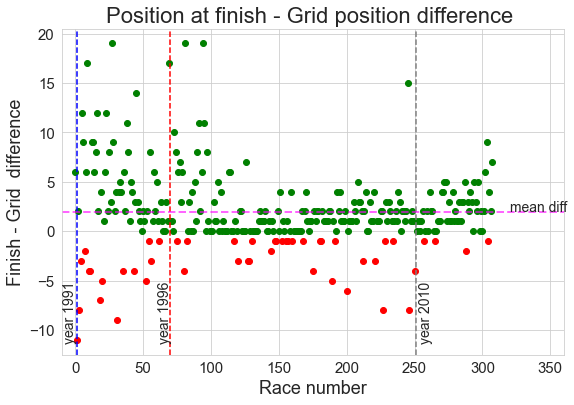

In [23]:
# Plot grid-race difference over races
fig3,ax3=plt.subplots(figsize=(9,6))

plt.title("Position at finish - Grid position difference ",fontsize=22)
plt.ylabel('Finish - Grid  difference',fontsize=18)
plt.xlabel('Race number',fontsize=18)
ax3.tick_params(labelsize=15)

plt.plot(positive_diff,color='green',marker='o',linestyle='none')
plt.plot(negative_diff,color='red',marker='o',linestyle='none')

plt.axvline(x=1,color='blue', ls='--')
plt.axvline(x=70,color='red', ls='--')
plt.axvline(x=251,color='grey', ls='--')

plt.axhline(y=race_grid_diff.mean(),color='magenta',ls='--', lw=2,alpha=0.6)
plt.xlim(-10,360)
plt.text(320,2.0,'mean diff',fontsize=14)

plt.text(-9, -11, 'year 1991',fontsize = 14,rotation=90)
plt.text(61, -11, 'year 1996',fontsize = 14,rotation=90)
plt.text(253, -11, 'year 2010',fontsize = 14,rotation=90)

plt.show()

As we can see, in the vast majority of races, Schumacher either improved the positions he occupied at the start of the races or maintained
the position he initially occupied till the finish line. 

Interestingly, during the first half of his career in Formula 1, Schumacher frequently significantly improved his postion in races as 
compared to his corresponding positions on the grid: sometimes he improved his positions by 19!
    
However, especially in the beginning of his career, when Schumacher rode for Benetton, he also often finished at significantly worse positions than his corresponding 
initial positions on the grid.

It is striking that in his last seasons driving for Mercedes in 2010-2012, only in four cases Schumacher finished slightly
worse than his positions on the grid (by 1 or 2 positions). In the rest of the races, Michael was able to improve or at least conserve
his postion throughout the race. This indicates the overall high quality of Schumacher's driving and shows the value of his experience.  

<span style="color:red;font-weight:700;font-size:20px">
     Best in: Races
</span>



## Which constructor was the best for Michael Schumacher?

To answer this question we can compare the average positions Michael Schumacher had in races and on the grid with different 
constructors.

In [24]:
constructors=pd.DataFrame(schumacher[schumacher.Race!=0].groupby('Constructor').agg({'Race':'mean','Grid':'mean'}).reset_index().values,columns=['constructor','position','grid'])
constructors.head()

,constructor,position,grid
0,Benetton,2.489362,3.638298
1,Ferrari,2.546667,3.52
2,Mercedes,8.931818,10.5


Let's define a function with which we can visualize the results.
We can reuse this function to answer more questions for the analysis of Schumacher's performannce in Formula 1.

In [25]:
def plot_bars(df):
    
    """This function creates a barplot for two variables positioned side by side for each category"""
    
    fig, ax =plt.subplots(figsize=(9,6))
    
    labels =df.iloc[:,0].values.tolist()
    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars
    
    rects1 = ax.bar(x - width/2, df['position'], width, label='Finish Position')
    rects2 = ax.bar(x + width/2, df['grid'], width, label='Grid Position')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Position',fontsize=17)
    ax.set_title('Grid and Finish positions for different '+ df.columns[0]+'s',fontsize=22)
    ax.set_xticks(x, labels)
    ax.legend(fontsize=17)
    ax.tick_params(axis='y',labelsize=15)
    ax.tick_params(axis='x',labelsize=17)
    
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()
    

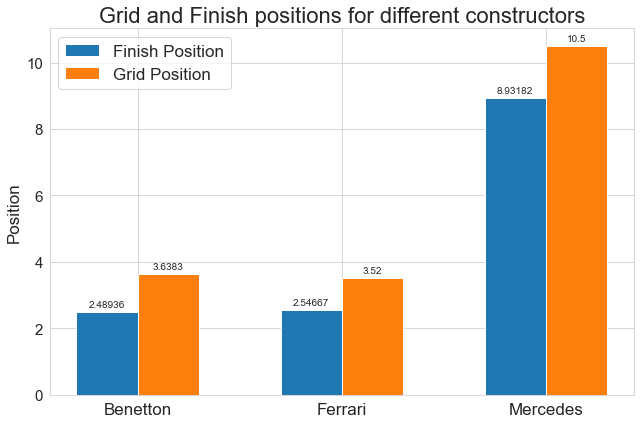

In [26]:
plot_bars(constructors)

As we can see, the constructors with which Schumacher achived most success were Benetton and Ferrari. 

The average position in races was slightly better when Michael raced for Benneton, although Schumacher achived slightly better average position
on the grid with Ferrari than with Benneton. 

Additionally, if we take into account the total amount of World Champion titles 
Michael Schumacher won with each contsructor (2- with Benetton and 5- with Ferrari), Ferrari would be the winner in this 
competition between constructors.

<span style="color:red;font-weight:700;font-size:20px">
    Best constructor: Ferrari
</span>

## Which tyre manufacturer was the best for Schumacher?

To answer this question, we will compare the average postions in races and the average positions on the grid that Schumacher had
with different tyre brands.

In [27]:
tyres=pd.DataFrame(schumacher[schumacher.Race!=0].groupby('Tyre').agg({'Race':'mean','Grid':'mean'}).reset_index().values,columns=['tyre','position','grid'])
tyres.head()

,tyre,position,grid
0,Bridgestone,3.290076,4.465649
1,Goodyear,2.475,3.3125
2,Pirelli,8.766667,10.366667


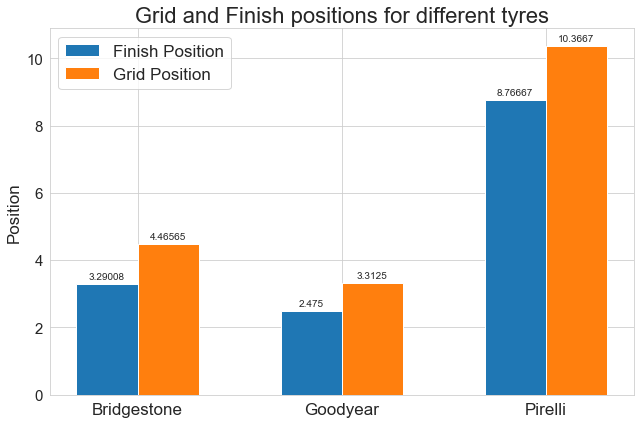

In [28]:
plot_bars(tyres)

We can see, that Schumacher had pretty similar results with two tyre manufacturers: Bridgestone and Goodyear. 
    
However, with the Goodyear tyres Schumacher had better results in both, races and qualification sessions as compared
to when he raced on the Bridgestone tyres. Thus, the best tyre brand for Schumacher was Goodyear. 

<span style="color:red;font-weight:700;font-size:20px">
    Best tyres: Goodyear
</span>


## Which engine was the best for Schumacher?

Let's now calculate Schumacher's average positions in races as well as his average grid positions depending on the engine 
in his car. 

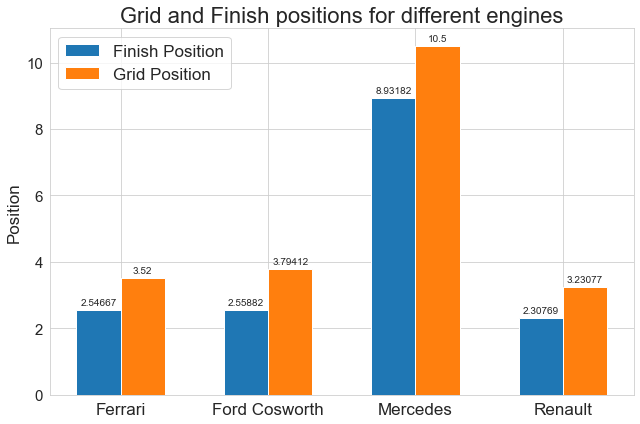

In [29]:
engines=pd.DataFrame(schumacher[schumacher.Race!=0].groupby('Engine').agg({'Race':'mean','Grid':'mean'}).reset_index().values,columns=['engine','position','grid'])
plot_bars(engines)

As we can see, throughout his career in Formula 1, Schumacher drove cars with four different kinds of engines:
Ferrari, Ford Cosworth, Mercedes and Renault.

With three of these engines, Schumacher had very good results: between the second and the third position on average in races,
and between the third and the fourth position on the grid.

Although, with the Renault engines Schumacher had the best average position in both,
races and qualification sessions (positions on the grid), which makes this engine the most successful one for Michael
Schumacher.

<span style="color:red;font-weight:700;font-size:20px">
    Best engine: Renault
</span>

## Which engine type is the best for Scumacher?

Throughout his career in Formula 1, Michael Schumacher drove cars either with ten-cylinder or eight-cylinder piston engines
(V10 and V8 correspondingly). Let's compare Schumacher's performance with the two engine types and find out which of them
was the most successful for Michael.

In [30]:
engine_types=pd.DataFrame(schumacher[schumacher.Race!=0].groupby('engine_type').agg({'Race':'mean','Grid':'mean'}).reset_index().values,columns=['engine_type','position','grid'])
engine_types.head()

,engine_type,position,grid
0,V10,2.52381,3.292517
1,V8,5.542553,7.202128


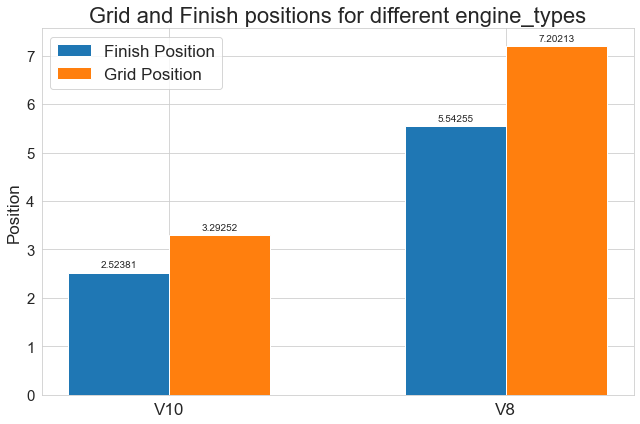

In [31]:
plot_bars(engine_types)

We can see that Schumacher had significantly better results with the ten-cylinder engines. When driving cars with this type of engine
Michael started races on average at the the position number 3.3 on the grid, and finished races on average at the position number 2.5.

Contrastingly, with the V10 engines Schumacher's average results were 7.2 as the average position on the grid and 5.5 as the average
position in races.Obviously, with the 10-cylinder engines Schumacher's performance was better than with the 8-cylinder ones.

<span style="color:red;font-weight:700;font-size:20px">
    Best engine type: V10
</span>

## Why sometimes Schumacher did not come to the finish line?

As we have seen above, in significant percentage of races (22%) Schumacher did not reach the finish line at all.
Let's now analyze the reasons behind such situations.

The column **'reason_out'** of the **schumacher** data frame contains the reasons behid every particular time Schumacher did not 
finish a race. We can calculate and visualize the frequencies of different reasons.

In [32]:
schumacher['reason_out'].value_counts()

Collision            21
Accident              9
Engine                9
Gearbox               5
Hydraulics            3
Fuel pressure         2
Wing                  2
Suspension            2
Fuel pump             2
Spin                  2
Wheel                 2
Puncture              2
Drive shaft           1
Late for penalty      1
Illegal skidblock     1
Brakes                1
Withdrew              1
Wheel bearing         1
Overheating           1
Steering              1
Wheel nut             1
20s penalty           1
Clutch                1
Name: reason_out, dtype: int64

In [33]:
# Data preparation for a pie chart
reasons_out=schumacher[~schumacher['reason_out'].isna()]['reason_out'].values
reasons_out=pd.DataFrame(reasons_out,columns=['reason_out'])
reasons_out[(reasons_out!='Collision')&(reasons_out!='Accident')&(reasons_out!='Engine')&(reasons_out!='Gearbox')
            &(reasons_out!='Hydraulics')]='Other'

reasons_out_count=reasons_out.value_counts()

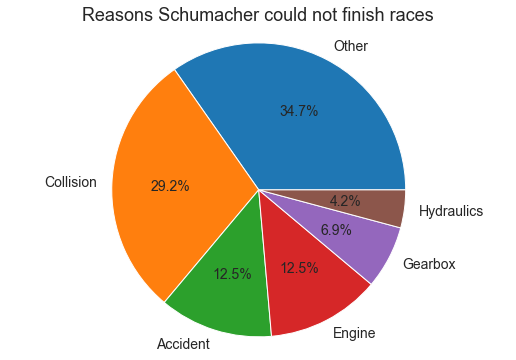

In [34]:
# Plot reasons why Scumacher could not finish races in a pie char
labels=['Other','Collision','Accident','Engine','Gearbox','Hydraulics']

fig4,ax4=plt.subplots(figsize=(9,6))


reasons_out_count.plot.pie(labels=labels,autopct='%1.1f%%',textprops={'fontsize': 14})
ax4.axis('equal')
ax4.set_ylabel('')
plt.title('Reasons Schumacher could not finish races',fontsize=18)
plt.show()


As we can see, the most common cause of Schumacher's not getting to the finish line was collisions, and the next two common 
causes were accidents and engine malfunction.

Let's analyze the distribution of frequencies of the reasons for not finishing races between different constructors.

In [35]:
schumacher[schumacher.Constructor!='Jordan'].groupby('Constructor').reason_out.value_counts()

Constructor  reason_out       
Benetton     Collision            7
             Accident             4
             Engine               4
             Fuel pump            2
             Gearbox              1
             Hydraulics           1
             Illegal skidblock    1
             Late for penalty     1
             Spin                 1
Ferrari      Collision            9
             Accident             5
             Engine               4
             Hydraulics           2
             Puncture             2
             Brakes               1
             Drive shaft          1
             Fuel pressure        1
             Gearbox              1
             Spin                 1
             Steering             1
             Suspension           1
             Wheel                1
             Wheel bearing        1
             Wing                 1
             Withdrew             1
Mercedes     Collision            5
             Gearbox             

In [36]:
reason_out_constructors=schumacher[schumacher.Constructor!='Jordan'].groupby('Constructor').reason_out.value_counts().unstack()

<function matplotlib.pyplot.show(close=None, block=None)>

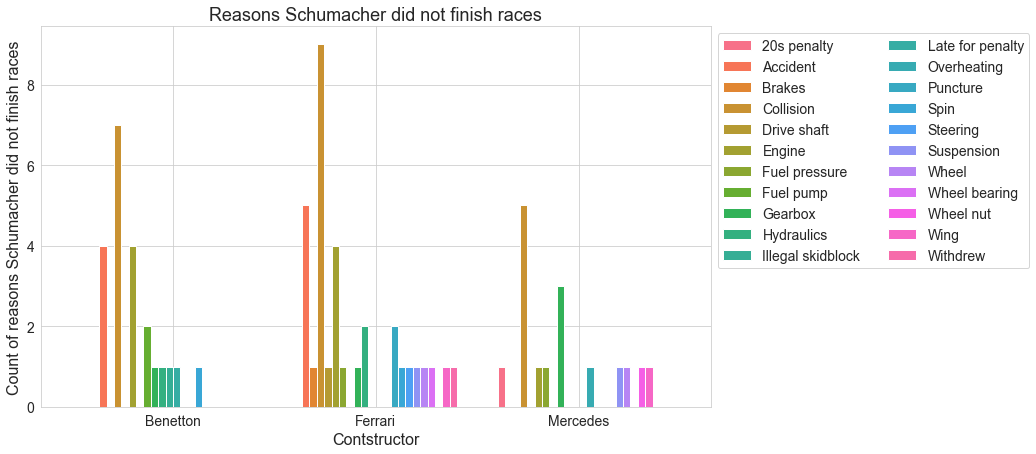

In [37]:
# Plot occurences of different reasons why Schumacher did not finish races for different constructors
clrs = sns.color_palette('husl', n_colors=22)

ax = reason_out_constructors.plot(kind='bar',figsize=(12, 7),width=0.8,
              rot=0,fontsize=14,align='center',color=clrs)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left',ncol=2,fontsize=14)

plt.title('Reasons Schumacher did not finish races',fontsize=18)
plt.ylabel('Count of reasons Schumacher did not finish races',fontsize=16)
plt.xlabel('Contstructor',fontsize=16)


plt.show

For all three constructors the most common cause of Schumacher's not getting to the finish line in races was collision.

The second most common cause for not finishing was accidents in the case of Benetton and Ferrari, whereas for Mercedes the second most
common reason why Schumacher did not finish races was due to the gearbox malfunction. 

Interestingly, engine malfunction was the second most common cause of not finishing (together with accidents) for Benetton and 
the third most common cause for Ferrari, as opposed to Mercedes where an engine malfunction in Schumacher's car happended only once.

<span style="color:red;font-weight:700;font-size:20px">
     Not getting to the finish line because of:  Collisions
</span>

## Which constuctor provided Schumacher with the most reliable car?


Although it is clear that collisions were the main cause for Schumacher's not getting to the finish line, it is interesting to
compare the true frequencies of such situations between constructors.

To do this, we will normalize the **'reason_out'** counts by
dividing the number of counts of each reason calculated for a particular constructor by the total number of races in which 
Schumacher drove for this constructor.

Let's first calculate the total amount of races Schumacher had with each constructor.

In [38]:
# Calculate the number of races for each constructor
schumacher.groupby('Constructor')['n'].count()

Constructor
Benetton     68
Ferrari     181
Jordan        1
Mercedes     58
Name: n, dtype: int64

Now we will create a data frame with normalized counts of reasons why Schumacher did not finish races with different
constructors. Note that we will exclude Jordan from the analysis since Schumacher only drove in one race with this constructor.

In [39]:
# Normalize counts of reasons out
reason_out_constructors.fillna(0,inplace=True)
reason_out_normalized=reason_out_constructors
for col in reason_out_constructors.columns:
    reason_out_normalized.loc['Ferrari'][col]=reason_out_normalized.loc['Ferrari'][col]/181
    reason_out_normalized.loc['Benetton'][col]=reason_out_normalized.loc['Benetton'][col]/68
    reason_out_normalized.loc['Mercedes'][col]=reason_out_normalized.loc['Mercedes'][col]/58

Let's plot the normalized occurences of the reasons for not finishing races in the form of a barplot so we can directly compare
how reliable the cars from different constructors were.

<function matplotlib.pyplot.show(close=None, block=None)>

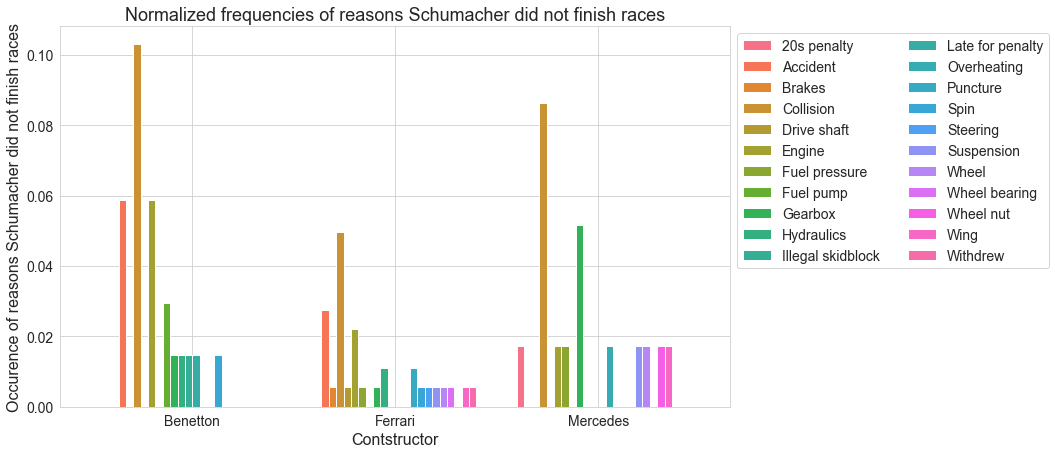

In [40]:
# Normalized frequncies of reasons for not finishing races on a barplot
clrs = sns.color_palette('husl', n_colors=22)

ax = reason_out_normalized.plot(kind='bar',figsize=(12, 7),width=0.8,
              rot=0,fontsize=14,align='center',color=clrs)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left',ncol=2,fontsize=14)

plt.title('Normalized frequencies of reasons Schumacher did not finish races',fontsize=18)
plt.ylabel('Occurence of reasons Schumacher did not finish races',fontsize=16)
plt.xlabel('Contstructor',fontsize=16)


plt.show

As we can see, the proportion of occurences of different causes of not finishing are maintained within different constructors:
the most common reason why Schumacher did not finish races with all three constructors was collision.

Interestingly,as now we can directly compare the occurences of not finishing races between the constructors, we can see
that overall with Ferrari Schumacher did not finish significantly lower percentage of races than with Benetton and Mercedes.
This is a clear indication of better reliability of Ferrari cars as compared to the other two constructors.

<span style="color:red;font-weight:700;font-size:20px">
     Most reliable car: Ferrari
</span>


## What is Schumacher's most successful Grand Prix?

To find out which Grand Prix was the most successful for Michael Schumacher, we will analyze the total number of wins and 
pole positions (1st place on the grid) Schumacher gained in each Grand Prix throughout his entire career in Formula 1.

In [41]:
# Calculate the number of pole positions per Grand Prix
pole_positions=schumacher[schumacher['Grid']==1].groupby('Grand Prix')['Grid'].count().sort_values()

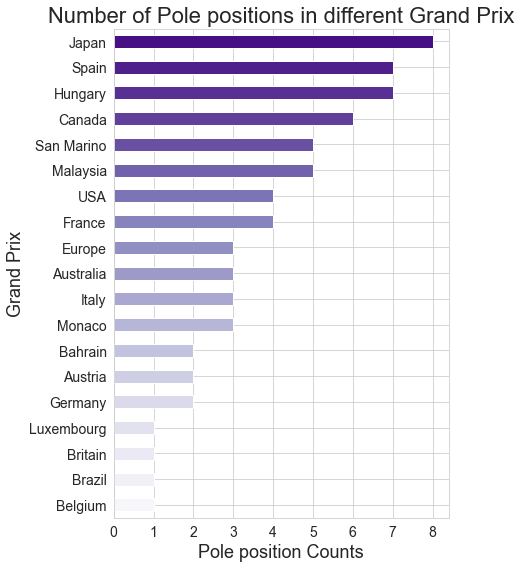

In [42]:
fig5,ax5 = plt.subplots(figsize=(6,9))

colors=sns.color_palette('Purples',n_colors=19)
pole_positions.plot(kind='barh',color=colors)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax5.set_xlabel('Pole position Counts',fontsize=18)
ax5.set_ylabel('Grand Prix',fontsize=18)
ax5.set_title('Number of Pole positions in different Grand Prix',fontsize=22)
ax5.tick_params(labelsize=14)
plt.xticks(np.arange(0, 9, 1.0))


plt.show()

We can see that the Grand Prix in which Schumacher gained the greatest number of pole positons was Japan - in Japan Michael 
started races from the first place on the grid eight times. 

Schumacher was slightly less successful in gaining pole 
positions in two other Grand Prix - Spain and Hungary. In both Grand Prix, Michael won pole positions seven times.
In addition,the Canadian Grand Prix was also quite successful for Michael - he won six pole positions there.

Let's now analyze how many wins Schumacher had in different Grand Prix.

In [43]:
# Calculate the number of wins per Grand Prix
wins=schumacher[schumacher['Race']==1].groupby('Grand Prix')['Race'].count().sort_values()

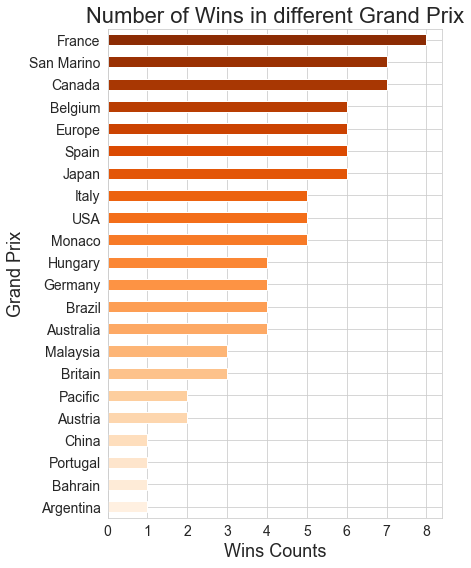

In [44]:
colors=sns.color_palette('Oranges',n_colors=22)

fig6,ax6 = plt.subplots(figsize=(6,9))
wins.plot(kind='barh',color=colors)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax6.set_xlabel('Wins Counts',fontsize=18)
ax6.set_ylabel('Grand Prix',fontsize=18)
ax6.set_title('Number of Wins in different Grand Prix',fontsize=22)
ax6.tick_params(labelsize=14)
plt.xticks(np.arange(0, 9, 1.0))

plt.show()

As it can be seen now, the Grand Prix in wich Schumacher gained the greatest number of fins is Grand Prix of France.
Surprisingly, this Grand Prix is not among those where the driver had the highest number of pole positions. In France, 
Schumacher started races from the first position on the grid only four times, however he won this Grand Prix eight times.

Curiously, Belgian Grand Prix was one of the most successful for Schumacher considering that the driver won six times there.
On the contrary, Schumacher started from the pole position only once in Belgium.

Taking into account that the number of wins directly influence the final result of a driver in each season, whereas pole
positions only increase driver's chances for winning a race, we can conclude that the most successful Grand Prix for Schumacher
should be the one where the driver had the greatest number of wins, namely France.

<span style="color:red;font-weight:700;font-size:20px">
    Best Grand Prix: France
</span>

## Which car model was the most successful for Schumacher?

Formula 1 constructors constantly work to improve and redesign their cars. Usually, contrstuctors provide a new car model for 
every new season. 

This means that Michael Schumacher drove over 20 different car models in the course of his career in Formula 1.
Thus, it is very interesting to establish which of these many car models was the most successfull in Schumacher's career.

We can answer this question by responding more specific questions like the following:

**1. What car model was the fastest?**

**2. Which  car model was the most reliable?**

**3. Which car allowed Schumacher to achieve the best resulst in races?**



**1. What car model was the fastest?**

We can answer this question by analyzing the amount of fastest laps achived with each car model Schumacher ever drove in Formula 1.
First, let's find out which car and for how many races was used by every team in each particular season.

In [45]:
schumacher.groupby('Year')['Team','car_model'].value_counts()

Year  Team                           car_model
1991  Camel Benetton Ford            B191          5
      Team 7Up Jordan                191           1
1992  Camel Benetton Ford            B192         13
                                     B191B         3
1993  Camel Benetton Ford            B193B        14
                                     B193          2
1994  Mild Seven Benetton Ford       B194         14
1995  Mild Seven Benetton Renault    B195         17
1996  Scuderia Ferrari               F310         16
1997  Scuderia Ferrari Marlboro      F310B        17
1998  Scuderia Ferrari Marlboro      F300         16
1999  Scuderia Ferrari Marlboro      F399         10
2000  Scuderia Ferrari Marlboro      F1-2000      17
2001  Scuderia Ferrari Marlboro      F2001        17
2002  Scuderia Ferrari Marlboro      F2002        15
                                     F2001         2
2003  Scuderia Ferrari Marlboro      F2003-GA     12
                                     F2002         4

For example, we can see that in 1991 Schumacher raced for two teams: **Camel Benetton Ford** and **Team 7Up Jordan** and drove
the car models **B191** and **191** correspondingly.

Now, lets calculate how many fastest laps Schumacher had every season. 
We can find the information about the fastest laps in the column **'F/Laps'** of the data frame **career_F1**.

In [46]:
career_F1.groupby('Season')['F/Laps'].sum().sort_values(ascending=False)

Season
2004    10
1994     8
1995     8
2006     7
2002     7
1998     6
1993     5
1999     5
2003     5
1997     3
2001     3
2005     3
2000     2
1996     2
1992     2
2012     1
2010     0
2011     0
1991     0
Name: F/Laps, dtype: int64

We can see that Schumacher had the highest number of fastest laps in 2004. In that season, Michael drove only one car -
Ferrari F2004.

<span style="color:red;font-weight:700;font-size:20px">
    The fastest car: Ferrari F2004
</span>


**2. Which car model was the most reliable?**

We can answer this question by calculating the mean value of times per race when Schumacher could not finish races with
each particular car model. In our calculations, we will exclude the situations when the reason for not finishing was Collision
since this factor does not depend on the car model but on the driver's behaviour.

In [47]:
condition=(schumacher['Race']==0)&(schumacher['reason_out']!='Collision')
schumacher['out']=np.where(condition,1,0)

schumacher.groupby('car_model')['out'].mean().sort_values()

car_model
B191B       0.000000
F2004M      0.000000
F2004       0.000000
F2003-GA    0.000000
F2002       0.052632
MGP W01     0.052632
F310B       0.058824
B195        0.058824
F2001       0.105263
248 F1      0.111111
F1-2000     0.117647
F300        0.125000
MGP W02     0.157895
B191        0.200000
F399        0.200000
B194        0.214286
B192        0.230769
F2005       0.235294
F1 W03      0.250000
B193B       0.357143
F310        0.375000
B193        0.500000
191         1.000000
Name: out, dtype: float64

We can see that Schumacher never was out of races for a car-related reasons when he drove four car models:
Benetton B191B, Ferrari F2004M, Ferrari F2004 and Ferrari F 2003-GA.

Importantly, two of these cars participated in really few races: Benetton B191B participated in three races,
and Ferrari 2004M was rode by Schumacher only in two races.

On the other hand, Ferrari F2004 and Ferrari F2003-GA did not have any malfunctions resulting in Schumacher's not
finishing races over long periods of time. That is why we can conclude that these two car models were the most reliable
ones in Schumacher's career.

<span style="color:red;font-weight:700;font-size:20px">
    The most realiable cars: 
        Ferrari F2004 and
        Ferrari F2003-GA
</span>

**3. What was the car that allowed Schumacher to achieve the best results in races?**

We can answer this question by analyzing the average positions in races and on the grid Schumacher 
had with each car model.

In [48]:
schumacher[schumacher['Race']!=0].groupby('car_model').agg({'Race':'mean','Grid':'mean'}).sort_values('Race')

,Race,Grid
car_model,,
B194,1.200000,1.500000
F2001,1.588235,1.411765
F1-2000,1.615385,2.000000
F2002,1.722222,1.833333
F2004,2.117647,3.941176
B193B,2.125000,4.000000
B195,2.307692,3.230769
248 F1,2.562500,5.375000
F300,2.615385,3.153846


We can see that Schumacher achieved the best result in races and the second best result in qualification sessions 
with Benetton B191 (Michael finished on average at the position 1.20 and started races at the position 1.50 on the grid).

Surprisingly, Ferrari F2004 occupies only the 5th place in this rating.

All in all, taking into account all three questions that we answered in this seccion of the notebook, we can conclude
that the two best cars Michael Schumacher drove in Formula 1 were Benetton B191 and Ferrari F2004.

<span style="color:red;font-weight:700;font-size:20px">
    Best cars:
        Benetton B191 and
        Ferrari F2004 
        
</span>

<p float="left">
  <img src="Benetton.jpg" width="400" />
  <img src="Ferrari.jpg" width="400" /> 
</p>

That's it! I hope you enjoyed reading this notebook as much as I enjoyed analyzing Michael Schumacher's career in Formula 1.